# Pixal: The Music Video Genre Classifier
**CSCE 489: Data Science and Analytics - Spring Fall 2016**  
Christopher Foy, Clayton Petty, Dalton Harris, Wesley Moncrief

## Overview and Motivation

Have you ever been watching a music video and stop and ask yourself: "Man, I wish I knew which genre this song is." Just weeks ago, this was us. Four college students with no sense of harmonic direction, just trying to find some musical fusion in our lives. We set out to find solution to this problem, and build a tool that analyzes music videos from YouTube and classifies them by genre. 

Pixal is a web interface that takes a YouTube URL as input, and outputs a genre classifier and an average-color-per-frame image. This is done using a combination of OpenCV color analysis and scikit-learn machine learning, and makes intelligent assumptions on our data to output a substantially accurate genre classification for the input video.

## Related Work

Our motivation primarily comes from GitHub user Sacert's 'Colors of Film' analysis, in which he analyzed popular Hollywood films and extracted avereage frame colors. He used OpenCV and some built-in python libraries to generate his output, which is an image with colors from each frame of the movie. Below is the output image for *Harry Potter and the Prizoner of Azkaban:*

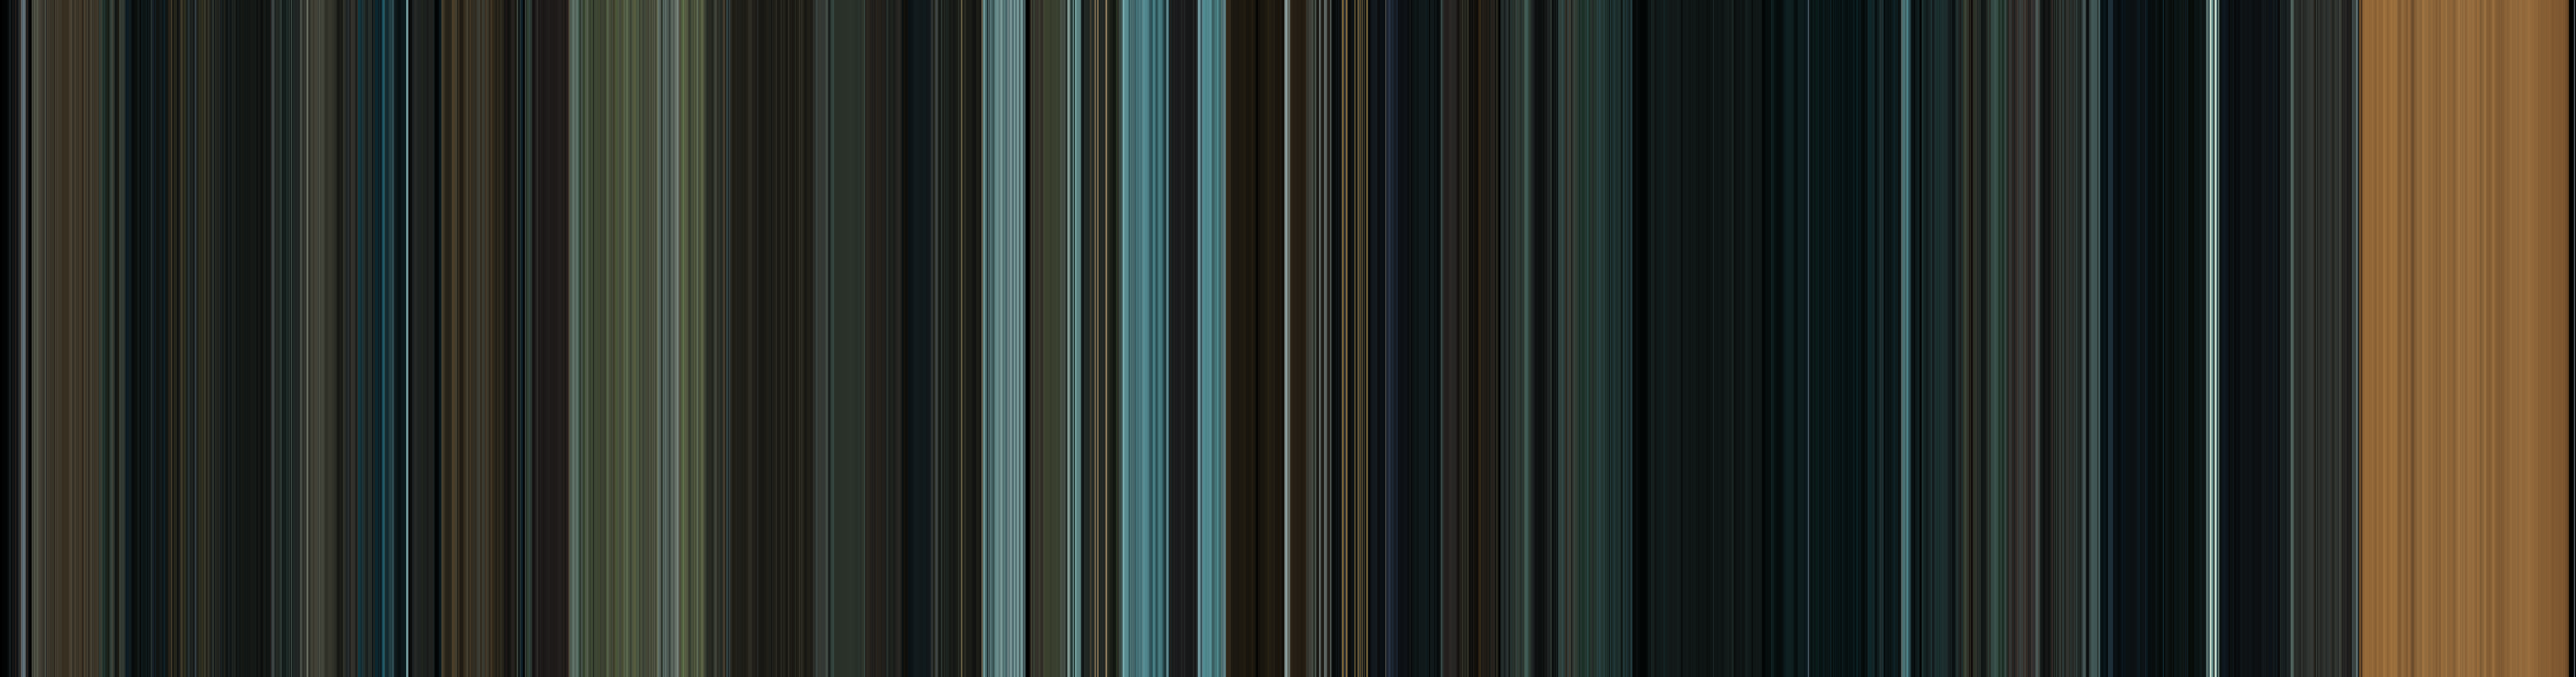

In [2]:
from IPython.display import Image
Image("color_output.png")

Our goal was to recreate Secert's analysis, but to do so with music videos. Instead of outputting an image, we wanted to take these frame color values and viewer statistics to classify the genre of the video. Our goal was to find relationships between channels, user interactions, and popularity based on their average frame color for the duration of the video. Ultimately, we set out to classify (with substantial accuracy) music videos into our predetermined categories of Rock, Pop, Country, EDM, and Rap.


## Initial Questions: What questions are you trying to answer? How did these questions evolve over the course of the project? What new questions did you consider in the course of your analysis? - Data: Source, scraping method, cleanup, storage, etc.

The question that drove our analysis changed quite a bit over the course of our analysis, but we settled on: "**are music videos classifiable by frame color and viewer statistics?**" This is a very weighted question, and we decided we'd start by simply seeing how much data we could get from Youtube. To do so, we looked into automating video downloads and scraping the metadata, and were successful in doing so. Thus, the first question we wanted to answer was "**how much data can we get from a given YouTube video?**"

## [TALK ABOUT HOW WE GOT THIS DATA - WES]

In [3]:
import pandas as pd
from os import path
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import sklearn

# Edit path if need be (shouldn't need to b/c we all have the same folder structure)
CSV_PATH_1 = '../Videos/all_data'
CSV_PATH_2 = '../Videos2/all_data2'
FILE_EXTENSION = '_all.csv'
GENRES = ['country', 'edm', 'pop', 'rap', 'rock']

# Containers for the data frames
genre_dfs = {}
all_genres = None

# Read in the 5 genre's of CV's
for genre in GENRES:
    genre_csv_path_1 = path.join(CSV_PATH_1, genre) + FILE_EXTENSION
    genre_csv_path_2 = path.join(CSV_PATH_2, genre) + FILE_EXTENSION
    df_1 = pd.read_csv(genre_csv_path_1)
    df_2 = pd.read_csv(genre_csv_path_2)
    df_1 = df_1.drop('Unnamed: 0',1)
    df_2 = df_2.drop('Unnamed: 0',1)
    df_combined = pd.concat([df_1,df_2],ignore_index=True)
    genre_dfs[genre] = df_combined

all_genres = pd.concat(genre_dfs.values())
all_genres.head(3)

# genre_dfs is now a dictionary that contains the 5 different data frames
# all_genres is a dataframe that contains all of the data

filename             author  \
0         Luke Bryan - Roller Coaster.mp4      LukeBryanVEVO   
1   Dierks Bentley - Drunk On A Plane.mp4  DierksBentleyVEVO   
2  Thomas Rhett - Get Me Some Of That.mp4    ThomasRhettVEVO   

                                         description  viewcount    rating  \
0  Luke Bryan - Crash My Party\nPurchase now on i...   28948653  4.840108   
1  Purchase Dierks Bentley’s latest music: http:/...   41548786  4.763639   
2  Music video by Thomas Rhett performing Get Me ...   43868160  4.826069   

    likes  dislikes  duration  length  \
0  127866      5324  00:04:23     263   
1  140682      8835  00:04:51     291   
2  128488      5841  00:03:13     193   

                                            keywords   ...    colors_8_red  \
0  [Luke, Bryan, Roller, Coaster, Capitol, Record...   ...             230   
1  [Dierks, Bentley, Drunk, On, Plane, Capitol, R...   ...              70   
2  [Thomas, Rhett, Get, Me, Some, Of, That, The, ...   ...              40   

   colors_8_blue  colors_8_green  colors_9_red  colors_9_blue  colors_9_green  \
0            210             190            90             70              70   
1             50              50           100            110             120   
2             50              30            50             70              50   

   colors_10_red  colors_10_blue  colors_10_green    genre  
0            240             220              200  country  
1             90              70               70  country  
2             40              60               50  country  

[3 rows x 42 columns]

As shown above, we get all sorts of data for each video (including the video itself), and store it in CSV files.


### Exploratory Data Analysis: What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?


### Final Analysis: What did you learn about the data? How did you answer the questions? How can you justify your answers?


### Presentation: Present your final results in a compelling and engaging way using text, visualizations, images, and videos on your project web site.

In accordance with scikit-learn, we had to make the genres ordinal to fit in the random forest classifiers. We add a new column to our dataframe to do so, write a function to populate it, and run it across the dataframe.

In [3]:
def genre_to_ordinal(genre_in):
    if(genre_in == "country"):
        return 0
    elif(genre_in == "pop"):
        return 1
    elif(genre_in == "rock"):
        return 2
    elif(genre_in == "edm"):
        return 3
    elif(genre_in == "rap"):
        return 4
    else:
        return genre_in
    
all_genres['genre_ordinal'] = all_genres.genre.apply(genre_to_ordinal)

We add in some boolean genre classifiers to make our analysis more fine-grained. Rather than saying "we predict this video is country with 50% confidence", we could say "we predict this video is not edm with 90% confidence" and so on.

In [4]:
# Adding is_country flag
def is_country(genre_in):
    if(genre_in == "country"):
        return 1
    else:
        return 0
    
all_genres['is_country'] = all_genres.genre.apply(is_country)

# Adding is_country flag
def is_rock(genre_in):
    if(genre_in == "rock"):
        return 1
    else:
        return 0
    
all_genres['is_rock'] = all_genres.genre.apply(is_rock)

# Adding is_edm flag
def is_edm(genre_in):
    if(genre_in == "edm"):
        return 1
    else:
        return 0
    
all_genres['is_edm'] = all_genres.genre.apply(is_edm)

# Adding is_rap flag
def is_rap(genre_in):
    if(genre_in == "rap"):
        return 1
    else:
        return 0
    
all_genres['is_rap'] = all_genres.genre.apply(is_rap)

# Adding is_country flag
def is_pop(genre_in):
    if(genre_in == "pop"):
        return 1
    else:
        return 0
    
all_genres['is_pop'] = all_genres.genre.apply(is_pop)

### Test and Train Sets
We create our training and test sets by splitting all_genres by genre, and making 10 of each genre train and 10 test. We aggregate by genre to make our full train and full test sets, each containing 50 records of various genres.

In [5]:
# Subset all_genres to group by individual genres
country_records  = all_genres[all_genres["genre"] == "country"]
rock_records     = all_genres[all_genres["genre"] == "rock"]
pop_records      = all_genres[all_genres["genre"] == "pop"]
edm_records      = all_genres[all_genres["genre"] == "edm"]
rap_records      = all_genres[all_genres["genre"] == "rap"]

# From the subsets above, create train and test sets from each
country_train = country_records.head(len(country_records) / 2)
country_test  = country_records.tail(len(country_records) / 2)
rock_train    = rock_records.head(len(rock_records) / 2)
rock_test     = rock_records.tail(len(rock_records) / 2)
pop_train     = pop_records.head(len(pop_records) / 2)
pop_test      = pop_records.tail(len(pop_records) / 2)
edm_train     = edm_records.head(len(edm_records) / 2)
edm_test      = edm_records.tail(len(edm_records) / 2)
rap_train     = rap_records.head(len(rap_records) / 2)
rap_test      = rap_records.tail(len(rap_records) / 2)

# Create big training and big test set for analysis
training_set = pd.concat([country_train,rock_train,pop_train,edm_train,rap_train])
test_set     = pd.concat([country_test,rock_test,pop_test,edm_test,rap_test])

training_set = training_set.fillna(0)
test_set = test_set.fillna(0)

print "Training Records:\t" , len(training_set)
print "Test Records:\t\t" , len(test_set)
# training_set.head()

Training Records:	405
Test Records:		405


### Generating Random Forest - Viewer Statistics
We start generating our random forests, and output a relative accuracy and a confusion matrix. In this first one, we simply factor in non-color variables (rating, likes, dislikes, length and viewcount), and run it across all records to predict an ordinal genre value.

In [6]:
# Predicting based solely on non-color features, using RF
clf = RandomForestClassifier(n_estimators=11)
meta_data_features = ['rating', 'likes','dislikes','length','viewcount']
y, _ = pd.factorize(training_set['genre_ordinal'])
clf = clf.fit(training_set[meta_data_features], y)

z, _ = pd.factorize(test_set['genre_ordinal'])
print clf.score(test_set[meta_data_features],z)
pd.crosstab(test_set.genre_ordinal, clf.predict(test_set[meta_data_features]),rownames=["Actual"], colnames=["Predicted"])

0.437037037037


Predicted   0   1   2   3   4
Actual                       
0          45   8   1  21   6
1           2  26  35   7  11
2          30  18   2  22   3
3           5  18  26  24  10
4           4  13   2  11  55

As shown above, this method yields relatively poor results. This is because there's no distinct clusters being created by our random forest, and simple viewer statistics tell us nothing about what kind of video we're watching. However, we see that country, rap and pop are initially somewhat distinct (diagonal is the highest value), and rock and edm are getting mistaken for one another. Let's see if we can't make something of this.

### Random Forest - Only Color Statistics
Below, we do the same random forest as above, but going strictly off of average frame color for the video.

We found the most commonly appearing color in each frame and called it the 'frame mode'. We then took all of the frame modes and found the 10 most common of them. Those became the 'color data' we use to analyze videos.

In [7]:
def gen_new_headers(old_headers):
    headers = ['colors_' + str(x+1) + '_' for x in range(10)]
    h = []
    for x in headers:
        h.append(x + 'red')
        h.append(x + 'blue')
        h.append(x + 'green')
    return old_headers + h + ['genre']

In [8]:
clf = RandomForestClassifier(n_estimators=11)
color_features = gen_new_headers([])[:-1]

# Predicting based solely on colors
y, _ = pd.factorize(training_set['genre_ordinal'])
clf = clf.fit(training_set[color_features], y)

z, _ = pd.factorize(test_set['genre_ordinal'])
print clf.score(test_set[color_features],z)
pd.crosstab(test_set.genre_ordinal, clf.predict(test_set[color_features]),rownames=["Actual"], colnames=["Predicted"])

0.212345679012


Predicted   0   1   2   3   4
Actual                       
0          21  18  10  18  14
1          15  11  23  19  13
2          30  17  12   6  10
3          12   8  36  14  13
4          15  13  27  19  11

This actually yields worse results than just the viewer statistics, because the color of a video by itself does not determine the genre. If rappers only had red in their videos and rockers only had black this might be somewhat accurate, but that's just not the case. But, what if we pair these findings with our initial viewer statistics? 

### Random Forest - All Features

In [9]:
clf = RandomForestClassifier(n_estimators=11)
all_features = meta_data_features + color_features

# Predicting based on colors and non-color features
y, _ = pd.factorize(training_set['genre_ordinal'])
clf = clf.fit(training_set[all_features], y)

z, _ = pd.factorize(test_set['genre_ordinal'])
print clf.score(test_set[all_features],z)
pd.crosstab(test_set.genre_ordinal, clf.predict(test_set[all_features]),rownames=["Actual"], colnames=["Predicted"])

0.377777777778


Predicted   0   1   2   3   4
Actual                       
0          43   5   1  21  11
1          10  22  37   8   4
2          26  24   4  12   9
3          13  16  20  21  13
4          32  10   3  12  28

### Singling Out Pop and Rap
Scores are expectedly low. It seems as if we're trying to make the classifier do way too much work, and are giving it very mediocre data to go off of. Recall that we're actually trying to determine WHICH genre a video is by the above code, not whether or not a video is of ONE specific genre. This brings back the binary classifiers that we created above, let's put those to use to see if we can improve these scores.

We try pop and rap first, since they seem to be the most distinct by what we've gathered above.

In [20]:
clf = RandomForestClassifier(n_estimators=11)
all_features = meta_data_features + color_features
print all_features

# Predicting based on colors and non-color features
y, _ = pd.factorize(training_set['is_pop'])
clf = clf.fit(training_set[all_features], y)

z, _ = pd.factorize(test_set['is_pop'])
print clf.score(test_set[all_features],z)
pd.crosstab(test_set.is_pop, clf.predict(test_set[all_features]),rownames=["Actual"], colnames=["Predicted"])

['rating', 'likes', 'dislikes', 'length', 'viewcount', 'colors_1_red', 'colors_1_blue', 'colors_1_green', 'colors_2_red', 'colors_2_blue', 'colors_2_green', 'colors_3_red', 'colors_3_blue', 'colors_3_green', 'colors_4_red', 'colors_4_blue', 'colors_4_green', 'colors_5_red', 'colors_5_blue', 'colors_5_green', 'colors_6_red', 'colors_6_blue', 'colors_6_green', 'colors_7_red', 'colors_7_blue', 'colors_7_green', 'colors_8_red', 'colors_8_blue', 'colors_8_green', 'colors_9_red', 'colors_9_blue', 'colors_9_green', 'colors_10_red', 'colors_10_blue', 'colors_10_green']
0.905063291139


Predicted    0   1
Actual            
0          143  15

In [11]:
clf = RandomForestClassifier(n_estimators=11)
all_features = meta_data_features + color_features

# Predicting based on colors and non-color features
y, _ = pd.factorize(training_set['is_rap'])
clf = clf.fit(training_set[all_features], y)

z, _ = pd.factorize(test_set['is_rap'])
print clf.score(test_set[all_features],z)
pd.crosstab(test_set.is_rap, clf.predict(test_set[all_features]),rownames=["Actual"], colnames=["Predicted"])

0.775308641975


Predicted    0   1
Actual            
0          295  25
1           66  19

What we're seeing above is a confusion matrix that, based on our training data, predicts whether or not a video in the test set is a pop video or not. In the "predicted" row, 0 means it predicts it's not a pop video, and that the 1 is. Likewise with the actual, 0 shows that the video actually wasn't a pop video, and the 1 shows that it was.

The confusion matrix above is our first effort at utilizing these binary classifiers. Most of our videos aren't pop videos, and the model did a good job of picking out those that aren't pop. However, we could use some improvement in the realm of "false negatives", where the model classified a video as not pop when it actually was.

We do these tests 50 times for sake of average score.

Rather than hard-coding each time we wanted to run something for average, we wrote a function that does it for us. All we have to do is pass in the boolean classifier in quotes ("is_rock", etc.), and the number of iterations that we want. Results are displayed below.

In [12]:
def multi_RF_averages(is_genre,num_iterations):
    clf = RandomForestClassifier(n_estimators=11)
    loop_indices = range(0,num_iterations)
    cumsum = 0

    for i in loop_indices:
        y, _ = pd.factorize(training_set[is_genre])
        clf = clf.fit(training_set[all_features], y)

        z, _ = pd.factorize(test_set[is_genre])
        cumsum = cumsum + clf.score(test_set[all_features],z)
    
    
    print "Average Score for",len(loop_indices),is_genre,"iterations:", cumsum/len(loop_indices)
    return clf

In [13]:
pop_class = multi_RF_averages("is_pop",50)
rap_class = multi_RF_averages("is_rap",50)
rock_class = multi_RF_averages("is_rock",50)
edm_class = multi_RF_averages("is_edm",50)
country_class = multi_RF_averages("is_country",50)

Average Score for 50 is_pop iterations: 0.810074074074
Average Score for 50 is_rap iterations: 0.782419753086
Average Score for 50 is_rock iterations: 0.815111111111
Average Score for 50 is_edm iterations: 0.757728395062
Average Score for 50 is_country iterations: 0.789037037037


The following creates several files that describe our classifiers. Our website will later  

We ran the above test with all genres, and as shown in above analysis, our country and edm typically have very low accuracy. We've seen above that edm and rock videos are getting mixed up with one another, so we assume that something is characteristic of these 2 genres that's not of everything else. We take out the edm values from our training and test datasets, hoping to improve accuracy.

In [15]:
# Removing EDM for better analysis - makes is_pop and is_rap much more accurate
training_set = pd.concat([country_train,rock_train,pop_train,rap_train])
test_set     = pd.concat([country_test,rock_test,pop_test,rap_test])

multi_RF_averages("is_pop",50)
multi_RF_averages("is_rap",50)
multi_RF_averages("is_rock",50)
multi_RF_averages("is_edm",50)
multi_RF_averages("is_country",50)

Average Score for 50 is_pop iterations: 0.839813664596
Average Score for 50 is_rap iterations: 0.745776397516
Average Score for 50 is_rock iterations: 0.770559006211
Average Score for 50 is_edm iterations: 1.0
Average Score for 50 is_country iterations: 0.73751552795


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

So, what does this tell us? Based on our training data, we have the best chance of accurately classifying something as pop or not pop (under these conditions). 

We want to find out which 2 are the most distinct, so we can make build our model based on that classification.

In [16]:
training_set = pd.concat([country_train,rock_train,edm_train,rap_train,pop_train])

test_set     = pd.concat([rock_test])
multi_RF_averages("is_rock",50)

test_set     = pd.concat([rap_test])
multi_RF_averages("is_rap",50)

test_set     = pd.concat([country_test])
multi_RF_averages("is_country",50)

test_set     = pd.concat([pop_test])
multi_RF_averages("is_pop",50)

test_set     = pd.concat([edm_test])
multi_RF_averages("is_edm",50)

Average Score for 50 is_rock iterations: 0.818133333333
Average Score for 50 is_rap iterations: 0.740941176471
Average Score for 50 is_country iterations: 0.222222222222
Average Score for 50 is_pop iterations: 0.733580246914
Average Score for 50 is_edm iterations: 0.920240963855


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Rock and EDM have suprisingly distinct classifiers. We should dive into the videos and see what this means.

In [17]:
test_set     = pd.concat([edm_test,rock_test])
multi_RF_averages("is_edm",50)
multi_RF_averages("is_rock",50)

Average Score for 50 is_edm iterations: 0.523417721519
Average Score for 50 is_rock iterations: 0.582784810127


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Selecting Most Valuable Features per Genre - Rock

In [18]:
model = ExtraTreesClassifier()

training_set = pd.concat([country_train,pop_train,rap_train,rock_train,edm_train])
y, _ = pd.factorize(training_set['is_rock'])
model.fit(training_set[all_features], y)

# display the relative importance of each attribute
print model.feature_importances_

[ 0.03846811  0.02920326  0.02852791  0.03283826  0.02624085  0.02927271
  0.03061705  0.04145827  0.02760838  0.03278831  0.03147717  0.02888402
  0.02731305  0.02210161  0.03284492  0.02185841  0.02423276  0.03882233
  0.02325956  0.04011883  0.02951602  0.03394499  0.02383908  0.02346804
  0.02077826  0.02110963  0.02767301  0.03051796  0.0235294   0.03013167
  0.03152001  0.02769159  0.01662285  0.02063449  0.03108723]


In [19]:
df = pd.DataFrame()
df['index'] = all_features

y, _ = pd.factorize(training_set['is_rap'])
model.fit(training_set[all_features], y)
        
df['rap'] = model.feature_importances_

y, _ = pd.factorize(training_set['is_rock'])
model.fit(training_set[all_features], y)

df['rock'] = model.feature_importances_

y, _ = pd.factorize(training_set['is_country'])
model.fit(training_set[all_features], y)

df['country'] = model.feature_importances_

y, _ = pd.factorize(training_set['is_edm'])
model.fit(training_set[all_features], y)

df['edm'] = model.feature_importances_

y, _ = pd.factorize(training_set['is_pop'])
model.fit(training_set[all_features], y)

df['pop'] = model.feature_importances_

df

index       rap      rock   country       edm       pop
0            rating  0.036840  0.029761  0.047238  0.030282  0.033350
1             likes  0.048106  0.031089  0.043094  0.028431  0.207346
2          dislikes  0.029864  0.022268  0.026436  0.035516  0.100328
3            length  0.033716  0.058606  0.028282  0.021171  0.026500
4         viewcount  0.060667  0.028724  0.056211  0.033229  0.161893
5      colors_1_red  0.028153  0.029535  0.025701  0.023419  0.009802
6     colors_1_blue  0.024451  0.029840  0.025259  0.031806  0.013806
7    colors_1_green  0.032623  0.029849  0.025119  0.018972  0.014541
8      colors_2_red  0.021276  0.020113  0.019760  0.023861  0.019548
9     colors_2_blue  0.022127  0.032183  0.021655  0.033623  0.010099
10   colors_2_green  0.032209  0.029270  0.015534  0.027924  0.013360
11     colors_3_red  0.015623  0.027176  0.025085  0.033451  0.016675
12    colors_3_blue  0.018486  0.023498  0.025797  0.025925  0.009024
13   colors_3_green  0.027611  0.035464  0.017282  0.028031  0.016586
14     colors_4_red  0.024357  0.026419  0.034669  0.026360  0.020561
15    colors_4_blue  0.023803  0.033206  0.027034  0.029020  0.017928
16   colors_4_green  0.032995  0.026545  0.046237  0.034240  0.013633
17     colors_5_red  0.018816  0.021588  0.031068  0.014472  0.007259
18    colors_5_blue  0.027442  0.027580  0.023511  0.022218  0.013119
19   colors_5_green  0.024206  0.030658  0.028089  0.030415  0.015435
20     colors_6_red  0.028036  0.028764  0.017045  0.038171  0.024823
21    colors_6_blue  0.026325  0.026840  0.018729  0.038393  0.012825
22   colors_6_green  0.040575  0.027842  0.020997  0.025722  0.010950
23     colors_7_red  0.034489  0.029140  0.031808  0.035738  0.019266
24    colors_7_blue  0.027380  0.023591  0.019162  0.022347  0.022058
25   colors_7_green  0.033132  0.022296  0.036605  0.033698  0.017231
26     colors_8_red  0.029530  0.030384  0.031424  0.035883  0.012702
27    colors_8_blue  0.017820  0.029916  0.036603  0.036666  0.015697
28   colors_8_green  0.025497  0.021393  0.033402  0.029437  0.017125
29     colors_9_red  0.035679  0.021382  0.030854  0.029311  0.017620
30    colors_9_blue  0.025344  0.029411  0.026206  0.032909  0.025955
31   colors_9_green  0.032054  0.028069  0.031367  0.024892  0.015187
32    colors_10_red  0.019568  0.026446  0.026118  0.015998  0.013044
33   colors_10_blue  0.018282  0.026999  0.021839  0.022118  0.015740
34  colors_10_green  0.022918  0.034156  0.024781  0.026350  0.018984

### Future Improvements 
- Run the above graph a number of times, take the average for each cell
- Based on the heaviest weighted parameters for each, run the random forest algorithm only taking these given parameters into consideration
- Generate a model that classifies videos dynamically
- Make more values ordinal - maybe to NLP or LDA to factor in descriptions, titles and lyrics